### Nome: Edgar Lopes Banhesse - RA: 993396
### Disciplina: IA369Y - Computação Afetiva - 2º Semestre 2018

### T3 - Análise e Síntese de Emoções em Conteúdo Multimídia
### Atividade 5 - Implementar um classificador de emoções para um corpus de imagens de faces rotuladas


## 1. Objetivo

Implementar um classificador de emoções para um corpus de imagens de faces rotuladas, baseado nos pontos característicos da face ("features" geométricos ou de "shape").

O corpus contém imagens da face de uma atriz expressando quatro estados emocionais diferentes, além do estado neutro: "joy", "anger", "fear", "sadness". Um arquivo "csv" associa cada imagem a um rótulo emocional e a coordenadas de pontos característicos da face.

## 2. Leitura do corpus de imagens de faces rotuladas

Ao analisar previamente o arquivo no formato "csv" por meio do editor de planilha Calc do LibreOffice foi observado que existem algumas colunas que podem ser descartadas para realizar a atividade5; as colunas que serão utilizadas serão a do nome do arquivo, do rótulo com a emoção atribuída a imagem e as 56 colunas referentes as coordenadas de pontos característicos da face.

Foi feito um script que utiliza a biblioteca Pandas para carregar os dados do corpus, excluindo as colunas desnecessárias.

In [3]:
#leitura do corpus de imagens de faces rotuladas
import pandas as pd

def read_csv_file():
    print("Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.")
    all_cols = list(range(0,65))
    cols_to_remove = set(range(2,9))
    cols = [col for col in all_cols if col not in cols_to_remove]
    return pd.read_csv('Faces_Disciplina\imagedb_CH_disciplina.csv', header=None, usecols=cols)

df = read_csv_file()

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 20)

df

Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.


,0,1,9,10,11,12,13,14,15,16,...,55,56,57,58,59,60,61,62,63,64
0,Em9_Fala3_0204_640x480.png,admiration,(303.5;319.0),(378.5;326.0),(343.5;319.5),(342.0;347.5),(334.0;315.5),(354.0;314.5),(318.5;316.5),(367.5;318.5),...,(462.0;224.5),(467.0;250.5),(436.0;300.0),(428.5;289.5),(326.5;325.0),(326.5;334.5),(345.5;327.0),(344.0;338.0),(363.5;325.5),(363.5;333.0)
1,Em9_Fala1_0220_640x480.png,admiration,(317.5;328.5),(367.5;328.0),(345.0;313.0),(343.5;352.0),(335.5;312.0),(353.5;312.0),(325.5;317.5),(362.0;317.5),...,(457.5;218.5),(464.0;246.0),(439.0;295.0),(428.5;288.0),(332.5;324.0),(332.5;336.0),(344.5;321.5),(344.0;339.5),(354.0;323.5),(355.0;336.5)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Em16_Fala1_0061_640x480.png,shame,(307.5;329.5),(365.5;327.0),(339.0;320.0),(337.5;347.5),(331.0;318.5),(345.5;317.0),(321.5;324.0),(356.5;322.5),...,(445.0;216.5),(453.0;242.0),(428.0;293.0),(418.5;283.0),(324.0;330.0),(324.0;331.5),(338.5;328.5),(338.5;332.0),(349.5;327.5),(350.0;331.0)
896,Em16_Fala3_0180_640x480.png,shame,(285.5;328.0),(346.5;328.0),(315.0;320.5),(317.0;345.5),(308.5;317.5),(323.5;317.5),(298.0;321.5),(334.0;322.5),...,(449.0;227.0),(458.0;254.5),(423.5;303.5),(414.0;293.5),(299.5;330.0),(299.5;331.5),(315.0;328.5),(315.0;332.5),(328.0;328.5),(328.0;331.0)


## 3. Análise dos dados do corpus de imagens de faces rotuladas

Foi observado que o corpus possui 896 amostras rotuladas dentre 23 rótulos emocionais.
Dois gráficos de dispersão foram plotados. O primeiro gráfico contém uma amostra aleatória dos marcos faciais de uma face. O segundo gráfico contém os marcos faciais de várias amostras. O gráfico de dispersão de várias amostras mostra que os marcos faciais das diferentes emoções estão próximos, portanto o classificador deverá ter mais trabalho para realizar a classificação.

In [5]:
#Impressão dos rótulos, números de linhas e colunas do corpus de imagens de faces rotuladas
print(f'Rótulos: ', df[1].unique())
print(f'Números de linhas e colunas: ', df.shape)

Rótulos:  ['admiration' 'anger' 'disapointment' 'disgust' 'fear' 'fearsconfirmed'
 'gloating' 'gratification' 'gratitude' 'happyfor' 'hope' 'joy' 'love'
 'neutral' 'pity' 'pride' 'relief' 'remorse' 'reproach' 'ressentment'
 'sadness' 'satisfaction' 'shame']
Números de linhas e colunas:  (897, 58)


Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.


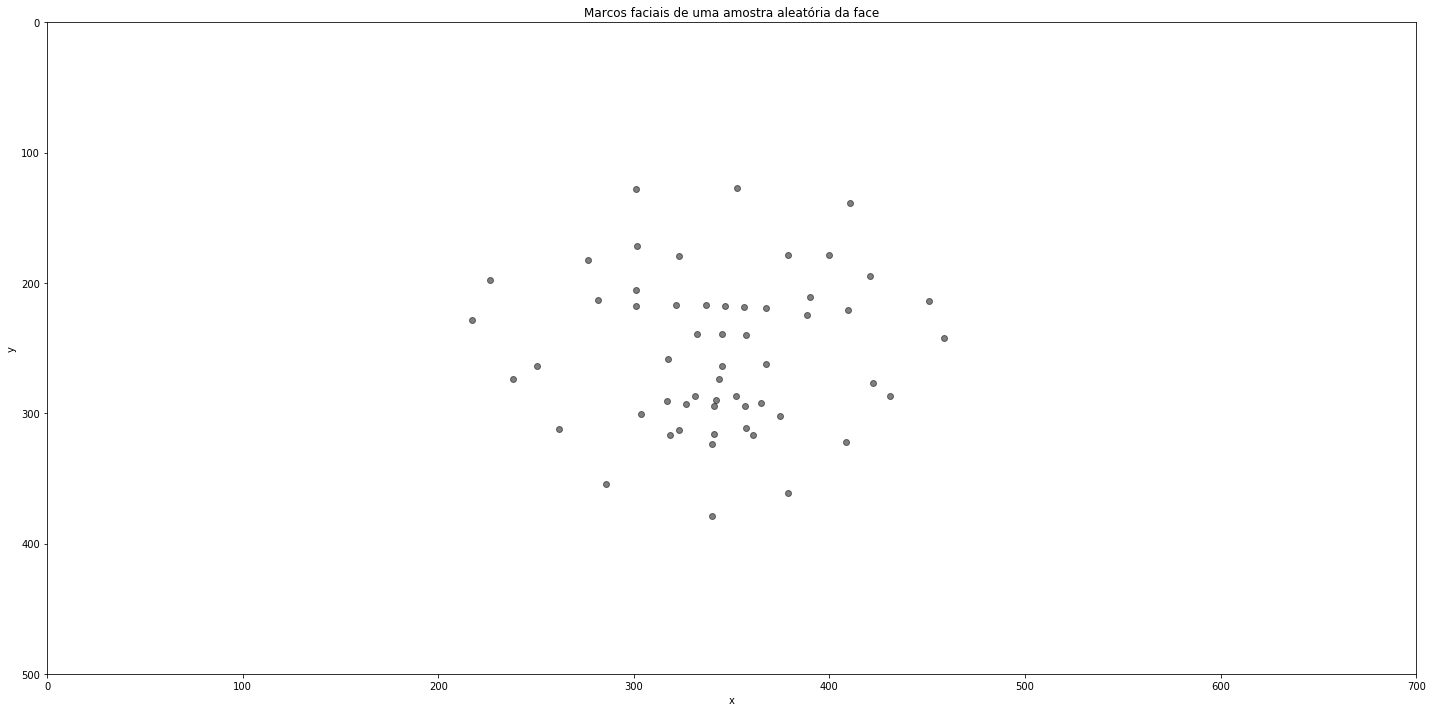

In [15]:
#Impressão de marcos faciais de uma amostra aleatória de face
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from random import randint

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

#Formata as coordenadas
def format_coord(coord):
    coord = coord.strip('()')
    return coord.split(";")

#Definição de subplot
fig, sample = plt.subplots()

def read_csv_file():
    print("Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.")
    all_cols = list(range(0,65))
    cols_to_remove = set(range(2,9))
    cols = [col for col in all_cols if col not in cols_to_remove]
    return pd.read_csv('Faces_Disciplina\imagedb_CH_disciplina.csv', header=None, usecols=cols)

df = read_csv_file()

row = randint(0, len(df.index))
xy_axis = []
x_axis = []
y_axis = []

for col in range(9,65):
    x, y = format_coord(df.loc[row,col])
    xy_axis.append((x,y))

xy_axis.sort(key=lambda x: x[0])
for tupla in xy_axis:
    x, y = tupla
    x_axis.append(float(x))
    y_axis.append(float(y))
    
sample.scatter(x_axis, y_axis, c=(0,0,0), alpha=0.5)

#Configuração e plotagem
sample.set_title('Marcos faciais de uma amostra aleatória da face')
sample.set_xlabel('x')
sample.set_ylabel('y')
sample.invert_yaxis()
sample.set_xlim([0, 700])
sample.set_ylim([500, 0])

plt.tight_layout()
plt.show()

Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.


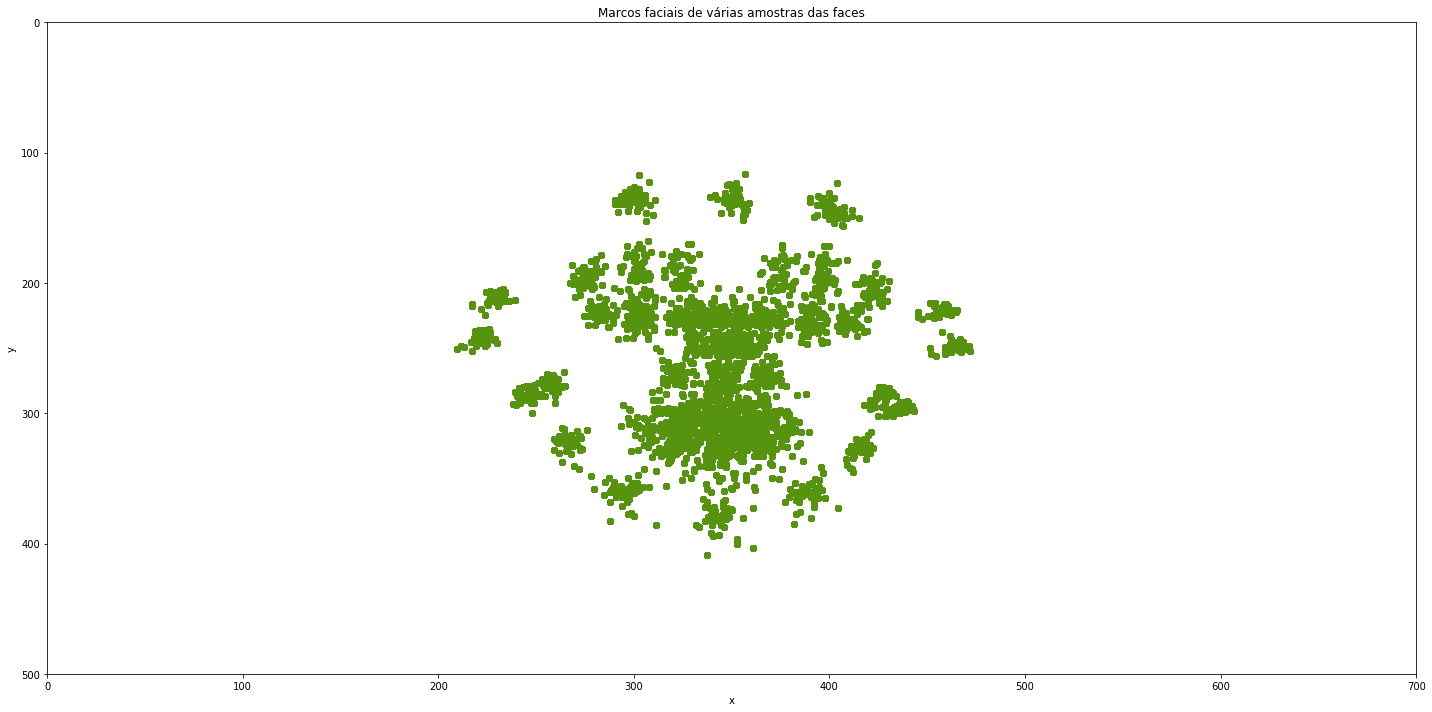

In [1]:
#Impressão de marcos faciais de váris amostras das faces
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import random
from random import randint

matplotlib.rcParams['figure.figsize'] = (20.0, 10.0)

#Formata as coordenadas
def format_coord(coord):
    coord = coord.strip('()')
    return coord.split(";")

#Definição de subplot
fig, all_sample = plt.subplots()

def read_csv_file():
    print("Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.")
    all_cols = list(range(0,65))
    cols_to_remove = set(range(2,9))
    cols = [col for col in all_cols if col not in cols_to_remove]
    return pd.read_csv('Faces_Disciplina\imagedb_CH_disciplina.csv', header=None, usecols=cols)

df = read_csv_file()

xy_axis = []

for row in range(0, 50):
    x_axis = []
    y_axis = []
    for col in range(9,65):        
        x, y = format_coord(df.loc[row,col])
        xy_axis.append((x,y))
        xy_axis.sort(key=lambda x: x[0])
        for tupla in xy_axis:
            x, y = tupla
            x_axis.append(float(x))
            y_axis.append(float(y))       
    all_sample.scatter(x_axis, y_axis, c=np.random.rand(3,), alpha=0.5)

#Configuração e plotagem
all_sample.set_title('Marcos faciais de várias amostras das faces')
all_sample.set_xlabel('x')
all_sample.set_ylabel('y')
all_sample.invert_yaxis()
all_sample.set_xlim([0, 700])
all_sample.set_ylim([500, 0])

plt.tight_layout()
plt.show()

## 4. Processamento e tratamento dos dados do corpus de imagens de faces rotuladas

Os dados das coordenadas dos marcos faciais do arquivo "csv" possuem o formato (x;y) e são do tipo "string". Desta forma, é necessário tratar as coordenadas para ter o formato [x y] para utilizar os algoritmos da biblioteca scikit-learn. Foi feito um script para realizar o tratamento dos dados do corpus de imagens de faces rotuladas, que renomeia as colunas do arquivo "csv" e expande em colunas com os dados das coordenadas.

In [2]:
#Trata os dados do corpus de imagens de faces rotuladas
import pandas as pd
import numpy as np

#Lê os dados do arquivo csv
def read_csv_file():
    print("Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.")
    all_cols = list(range(0,65))
    cols_to_remove = set(range(2,9))
    cols = [col for col in all_cols if col not in cols_to_remove]
    return pd.read_csv('Faces_Disciplina\imagedb_CH_disciplina.csv', header=None, usecols=cols)

df = read_csv_file()

#Formata as coordenadas
def format_coord(coord):
    coord = coord.strip('()')
    return coord.split(";")

#Renomeia as colunas do corpus
new_cols = []
new_cols.append('file_name')
new_cols.append('label')
for i in range(1, len(df.columns)-1):
    new_cols.append('v' + str(i))
df.columns = new_cols

#Separa as coordenadas, substituindo o formato (x1;y1) por x1 y1
for col in df.columns[2:]:
    s = df[col].apply(format_coord)
    df['x'+col[1:]] = s.apply(lambda x: x[0])
    df['y'+col[1:]] = s.apply(lambda x: x[1])
    del df[col]

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 20)

print("\nNomes das colunas antes de separar os valores das coordenadas:")
print(new_cols)
print("\nData frame depois de separar os valores das coordenadas:")
df

Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.

Nomes das colunas antes de separar os valores das coordenadas:
['file_name', 'label', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'v29', 'v30', 'v31', 'v32', 'v33', 'v34', 'v35', 'v36', 'v37', 'v38', 'v39', 'v40', 'v41', 'v42', 'v43', 'v44', 'v45', 'v46', 'v47', 'v48', 'v49', 'v50', 'v51', 'v52', 'v53', 'v54', 'v55', 'v56']

Data frame depois de separar os valores das coordenadas:


,file_name,label,x1,y1,x2,y2,x3,y3,x4,y4,...,x52,y52,x53,y53,x54,y54,x55,y55,x56,y56
0,Em9_Fala3_0204_640x480.png,admiration,303.5,319.0,378.5,326.0,343.5,319.5,342.0,347.5,...,326.5,334.5,345.5,327.0,344.0,338.0,363.5,325.5,363.5,333.0
1,Em9_Fala1_0220_640x480.png,admiration,317.5,328.5,367.5,328.0,345.0,313.0,343.5,352.0,...,332.5,336.0,344.5,321.5,344.0,339.5,354.0,323.5,355.0,336.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,Em16_Fala1_0061_640x480.png,shame,307.5,329.5,365.5,327.0,339.0,320.0,337.5,347.5,...,324.0,331.5,338.5,328.5,338.5,332.0,349.5,327.5,350.0,331.0
896,Em16_Fala3_0180_640x480.png,shame,285.5,328.0,346.5,328.0,315.0,320.5,317.0,345.5,...,299.5,331.5,315.0,328.5,315.0,332.5,328.0,328.5,328.0,331.0


## 5. Separação das amostras do corpus por rótulos utilizados na resolução do problema

O objetivo da atividade é classificar apenas as amostras com os rótulos "neutral", "joy", "anger", "fear" e "sadness". Desta forma, o curpus foi reduzido para ter somente as amostras com os rótulos desejados.

In [99]:
#Redução das amostras do corpus para amostras com os rótulos "neutral", "joy", "anger", "fear" e "sadness"
df = df.loc[df['label'].isin(['neutral', 'joy', 'anger', 'fear', 'sadness'])]
print(f'Rótulos: ', df['label'].unique())
print(f'Números de linhas e colunas: ', df.shape)

Rótulos:  ['anger' 'fear' 'joy' 'neutral' 'sadness']
Números de linhas e colunas:  (195, 226)


## 6. Divisão do corpus para treinar e validar o classificador

O corpus de imagens de faces rotuladas foi dividido em dois conjuntos de amostras de forma aleatória:

1. 75% das amostras serão utilizadas para treinar o classificador.
2. 25% das amostras serão utilizadas para validar o classificador.

Foi feito um script para realizar a divisão das amostras.

In [8]:
#Divide o corpus em dois conjuntos de amostras para treinar e validar o classificador
data = np.random.rand(len(df)) < 0.75
training = df[data]
testing = df[~data]

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
print(f'Dados para treinamento do classificador\n', training)
print(f'Dados para validação do classificador\n', testing)

Dados para treinamento do classificador
                               0           1              9              10  \
3     Em9_Fala1_0142_640x480.png  admiration  (298.0;297.5)  (378.0;302.0)   
4     Em9_Fala2_0079_640x480.png  admiration  (317.0;315.5)  (375.0;317.0)   
8     Em9_Fala2_0070_640x480.png  admiration  (315.5;297.5)  (376.0;299.0)   
9     Em9_Fala2_0308_640x480.png  admiration  (300.0;306.5)  (377.0;312.0)   
10    Em9_Fala3_0120_640x480.png  admiration  (300.5;316.5)  (371.0;319.5)   
..                           ...         ...            ...            ...   
891  Em16_Fala1_0345_640x480.png       shame  (291.0;311.5)  (361.5;331.0)   
892  Em16_Fala1_0486_640x480.png       shame  (304.0;338.5)  (370.0;333.0)   
894  Em16_Fala2_0375_640x480.png       shame  (302.0;329.5)  (371.5;337.0)   
895  Em16_Fala1_0061_640x480.png       shame  (307.5;329.5)  (365.5;327.0)   
896  Em16_Fala3_0180_640x480.png       shame  (285.5;328.0)  (346.5;328.0)   

                11    

## 7. Escolha do Classificador

A biblioteca Scikit-Learn em http://scikit-learn.org fornece um conjunto de algoritmos para classificação, regressão e agrupamento.

Para escolher um algoritmo de classificação para resolução do problema foi utilizado um mapa fornecido no site do scikit-learn em http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html. A escolha do classificador foi feita com base no propósito da atividade e na quantidade de amostras.

Como a atividade consiste na classificação de um corpus de imagens de faces rotuladas com uma quantidade de amostras menor que 100 mil, conforme o mapa de algoritmos do scikit-learn o mais apropriado é o Linear SVC (Linear Support Vector Classification).

## 8. Execução do Classificador Linear SVC no corpus de imagens de faces rotuladas

O classificador escolhido, Linear SVC foi executado nos dados divididos nos conjuntos de treinamento e validação. Foi feito um script para executar a classificação e medir a acurácia do classificador. Foi observado que a acurácia média do classificador Linear SVC em 10 execuções foi de 90%.

In [90]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC

#Formata as coordenadas
def format_coord(coord):
    coord = coord.strip('()')
    return coord.split(";")

#Lê os dados do arquivo csv
def read_csv_file():
    print("Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.")
    all_cols = list(range(0,65))
    cols_to_remove = set(range(2,9))
    cols = [col for col in all_cols if col not in cols_to_remove]
    return pd.read_csv('Faces_Disciplina\imagedb_CH_disciplina.csv', header=None, usecols=cols)

df = read_csv_file()

#Renomeia as colunas do corpus
new_cols = []
new_cols.append('file_name')
new_cols.append('label')
for i in range(1, len(df.columns)-1):
    new_cols.append('v' + str(i))
df.columns = new_cols

#Separa as coordenadas, substituindo o formato (x1;y1) por x1 y1
for col in df.columns[2:]:
    s = df[col].apply(format_coord)
    df['x'+col[1:]] = s.apply(lambda x: x[0])
    df['y'+col[1:]] = s.apply(lambda x: x[1])
    del df[col]

df = df.loc[df['label'].isin(['neutral', 'joy', 'anger', 'fear', 'sadness'])]
    
class_score = []
for i in range(0, 10):
    #Divisão do dataset em treinamento (75%) e validação (25%)
    data = np.random.rand(len(df)) < 0.75
    training = df[data]
    testing = df[~data]

    #Preparação dos dados e execução do classificador
    training_set = training.loc[:,'x1':].values
    training_labels = training['label'].values
    testing_set = testing.loc[:,'x1':].values
    testing_labels = testing['label'].values
    classifier = SVC(kernel='linear')
    classifier.fit(training_set, training_labels)

    #Score da classificação para os rótulos
    score = classifier.score(testing_set, testing_labels)
    class_score.append(score)
    print("#{0:2} Score = {1:.2f}".format(i+1, score))

print(("Média de acurácia depois de 10 execuções: {0:.2f}".format(np.mean(class_score))))

Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.
# 1 Score = 0.96
# 2 Score = 0.95
# 3 Score = 0.88
# 4 Score = 0.93
# 5 Score = 0.83
# 6 Score = 0.91
# 7 Score = 0.91
# 8 Score = 0.90
# 9 Score = 0.92
#10 Score = 0.93
Média de acurácia depois de 10 execuções: 0.91


## 9. Análise e melhoria do desempenho do classificador Linear SVC

Numa tentativa de melhorar a acurácia do classificador Linear SVC, as coordenadas dos marcos faciais (features) foram trabalhadas para ficarem na faixa de 0 a 1. O objetivo é evitar que features com valores muito altos interfiram na classificação.

Além disso, foi feito a adição de features derivadas dos marcos faciais. Para evitar que a movimentação da face interfira nas coordenadas foi utilizado o centro geométrico dos marcos faciais por meio das médias das coordenadas x e y. Novas features foram obtidas por meio da distância dos marcos originais com as médias.

Os dois scripts utilizados são apresentados a seguir.

In [91]:
#Teste de um dimensionador para melhorar a acurácia do classificador
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df_scaled.columns[2:]] = scaler.fit_transform(df_scaled[df_scaled.columns[2:]])

pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 10)

df_scaled

,file_name,label,x1,y1,x2,...,y54,x55,y55,x56,y56
39,Em22_Fala1_0049_640x480.png,anger,0.275862,0.768519,0.426667,...,1,0.486111,0.740741,0.445946,0.967742
40,Em22_Fala3_0041_640x480.png,anger,1,1,0.853333,...,0.977273,0.916667,0.740741,0.945946,0.83871
...,...,...,...,...,...,...,...,...,...,...,...
817,Em12_Fala1_0068_640x480.png,sadness,0.425287,0.685185,0.24,...,0.55303,0.194444,0.787037,0.216216,0.58871
818,Em12_Fala3_0058_640x480.png,sadness,0.310345,0.583333,0.36,...,0.386364,0.291667,0.62037,0.310811,0.443548


In [104]:
#Teste com novas features (marcos relativos)
df_relative = df.copy()
df_relative.iloc[:,2::] = df_relative.iloc[:,2::].apply(pd.to_numeric, errors='coerce')

#Calcula a média das coordenadas x
dfX = df_relative.iloc[:,range(2,len(df_relative.columns),2)]
dfX = dfX.apply(pd.to_numeric, errors='coerce')
dfX['avgX'] = dfX.mean(axis=1)

#Calcula a média da coordenadas y
dfY = df_relative.iloc[:,range(2,len(df_relative.columns),2)]
dfY = dfY.apply(pd.to_numeric, errors='coerce')
dfY['avgY'] = dfY.mean(axis=1)

#Calcula as novas features a partir dos marcos relativos e dos pontos central na face
for col in df_relative.columns[2::2]:
    df_relative[col] = abs(df_relative[col] - dfX['avgX'])

for col in df_relative.columns[3::2]:
    df_relative[col] = abs(df_relative[col] - dfY['avgY'])

#Coloca as novas colunas no fim do dataframe
for col in df_relative.columns[2:]:
    df[col+'r'] = df_relative[col]
    
pd.set_option('display.max_rows', 5)
pd.set_option('display.max_columns', 15)

df

,file_name,label,x1,y1,x2,y2,x3,...,y53rr,x54rr,y54rr,x55rr,y55rr,x56rr,y56rr
39,Em22_Fala1_0049_640x480.png,anger,302.0,328.0,370.5,331.5,340.0,...,188.933,173.933,153.433,151.933,188.433,153.933,160.433
40,Em22_Fala3_0041_640x480.png,anger,333.5,340.5,386.5,337.0,365.0,...,212.603,173.103,178.103,159.603,211.603,158.603,191.603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,Em12_Fala1_0068_640x480.png,sadness,308.5,323.5,363.5,327.0,338.5,...,188.929,176.429,184.929,164.429,187.929,164.429,185.929
818,Em12_Fala3_0058_640x480.png,sadness,303.5,318.0,368.0,319.5,337.5,...,192.679,171.679,190.679,155.679,191.679,155.679,189.679


## 10. Teste com a classificação final

Após gerar as novas features, o código foi executado para comparar a acurácia do classificador Linear SVC com as alterações propostas.

In [103]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report

#Formata as coordenadas
def format_coord(coord):
    coord = coord.strip('()')
    return coord.split(";")

#Lê os dados do arquivo csv
def read_csv_file():
    print("Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.")
    all_cols = list(range(0,65))
    cols_to_remove = set(range(2,9))
    cols = [col for col in all_cols if col not in cols_to_remove]
    return pd.read_csv('Faces_Disciplina\imagedb_CH_disciplina.csv', header=None, usecols=cols)

def general_classifier(df):
    #Divisão do dataset em treinamento (75%) e validação (25%)
    data = np.random.rand(len(df)) < 0.75
    training = df[data]
    testing = df[~data]

    #Preparação dos dados e execução do classificador
    training_set = training.loc[:,'x1':].values
    training_labels = training['label'].values
    testing_set = testing.loc[:,'x1':].values
    testing_labels = testing['label'].values    
    classifier = SVC(kernel='linear')
    classifier.fit(training_set, training_labels)

    #Score da classificação para os rótulos    
    label_predict = classifier.predict(testing_set)
    print(classification_report(testing_labels, label_predict))    
    score = classifier.score(testing_set, testing_labels)
    return score

#Leitura e preparação do corpus
df = read_csv_file()

#Renomeia as colunas do corpus
new_cols = []
new_cols.append('file_name')
new_cols.append('label')
for i in range(1, len(df.columns)-1):
    new_cols.append('v' + str(i))
df.columns = new_cols

#Separa as coordenadas, substituindo o formato (x1;y1) por x1 y1
for col in df.columns[2:]:
    s = df[col].apply(format_coord)
    df['x'+col[1:]] = s.apply(lambda x: x[0])
    df['y'+col[1:]] = s.apply(lambda x: x[1])
    del df[col]

#Redução das amostras
df = df.loc[df['label'].isin(['neutral', 'joy', 'anger', 'fear', 'sadness'])]

#Executa classificação
print("Classificação inicial:")
score = general_classifier(df)
print(("Acurácia sem scaler: {0:.2f}".format(score)))

#Execução com scaler de features
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df_scaled.columns[2:]] = scaler.fit_transform(df_scaled[df_scaled.columns[2:]])
print("Classificação com scaler:")
score = classify(df_scaled)
print(("Acurácia com scaler: {0:.2f}".format(score)))

#Execução com marcos relativos
df_relative = df.copy()
df_relative.iloc[:,2::] = df_relative.iloc[:,2::].apply(pd.to_numeric, errors='coerce')

#Calcula a média das coordenadas x
dfX = df_relative.iloc[:,range(2,len(df_relative.columns),2)]
dfX = dfX.apply(pd.to_numeric, errors='coerce')
dfX['avgX'] = dfX.mean(axis=1)

#Calcula a média das coordenadas y
dfY = df_relative.iloc[:,range(2,len(df_relative.columns),2)]
dfY = dfY.apply(pd.to_numeric, errors='coerce')
dfY['avgY'] = dfY.mean(axis=1)

#Calcula as novas features a partir dos marcos relativos e dos pontos central na face
for col in df_relative.columns[2::2]:
    df_relative[col] = (df_relative[col] - dfX['avgX'])

for col in df_relative.columns[3::2]:
    df_relative[col] = (df_relative[col] - dfY['avgY'])

#Coloca as novas colunas no fim do dataframe
for col in df_relative.columns[2:]:
    df[col+'r'] = df_relative[col]

print("Classificação com marcos relativos:")
score = general_classifier(df)
print(("Acurácia com marcos relativos: {0:.2f}".format(score)))

Leitura do corpus com as colunas: nome do arquivo, rótulo, 56 colunas de coordenadas.
Classificação inicial:
             precision    recall  f1-score   support

      anger       0.89      1.00      0.94         8
       fear       0.88      0.88      0.88         8
        joy       1.00      1.00      1.00         8
    neutral       0.88      1.00      0.93        14
    sadness       1.00      0.70      0.82        10

avg / total       0.92      0.92      0.91        48

Acurácia sem scaler: 0.92
Classificação com scaler:
             precision    recall  f1-score   support

      anger       0.80      1.00      0.89         8
       fear       0.91      0.83      0.87        12
        joy       1.00      1.00      1.00        10
    neutral       1.00      0.83      0.91        12
    sadness       0.73      0.80      0.76        10

avg / total       0.90      0.88      0.89        52

Acurácia com scaler: 0.88
Classificação com marcos relativos:
             precision    rec

## 11. Resultados e conclusão

- A acurácia do algoritmo não foi alterada de forma significativa com a mudança e adição de novas features, tendo uma pequena melhoria com os marcos relativos. Talvez isso tenha ocorrido pois as features (marcos faciais) existentes tenham informações suficientes para uso do classificador Linear SVC.
- Ao analisar o corpus de imagens faciais rotuladas, nota-se que a quantidade de rótulos iniciais é grande, sendo 23 rótulos. Ao reduzir o corpus para 5 rótulos a quantidade de amostras também é reduzida para cerca de 200 amostras, o que ajuda o classificador Linear SVC a obter uma melhor acurácia.

## 12. Referências

- Biblioteca Scikit-Learn em http://scikit-learn.org
- Mapa para escolha de algoritmos do scikit-learn em http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html